## 1. Problem Framing
Predict a person's **salary** based on **years of experience**.
 
- Input (X): Years of Experience
- Output (Y): Salary
- Type: Supervised Learning (Regression)

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df=pd.read_csv('Salary_Data.csv')
print(df.head())
print(df.describe())
print(df.info())
print(df.isnull().sum())
print(df.shape)
df['YearsExperience']=df['YearsExperience'].fillna(df['YearsExperience'].mean())
df['Salary']=df['Salary'].fillna(df['Salary'].mean())

   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              NaN  37731.0
3              2.0  43525.0
4              2.2  39891.0
       YearsExperience         Salary
count        29.000000      29.000000
mean          5.444828   76549.655172
std           2.793562   27732.777228
min           1.100000   37731.000000
25%           3.200000   56642.000000
50%           4.900000   66029.000000
75%           7.900000  101302.000000
max          10.500000  122391.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  29 non-null     float64
 1   Salary           29 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes
None
YearsExperience    1
Salary             1
dtype: int64
(30, 2)


In [3]:
X=df['YearsExperience'].values.reshape(-1,1)
y=df['Salary'].values.reshape(-1,1)
X,y

(array([[ 1.1       ],
        [ 1.3       ],
        [ 5.44482759],
        [ 2.        ],
        [ 2.2       ],
        [ 2.9       ],
        [ 3.        ],
        [ 3.2       ],
        [ 3.2       ],
        [ 3.7       ],
        [ 3.9       ],
        [ 4.        ],
        [ 4.        ],
        [ 4.1       ],
        [ 4.5       ],
        [ 4.9       ],
        [ 5.1       ],
        [ 5.3       ],
        [ 5.9       ],
        [ 6.        ],
        [ 6.8       ],
        [ 7.1       ],
        [ 7.9       ],
        [ 8.2       ],
        [ 8.7       ],
        [ 9.        ],
        [ 9.5       ],
        [ 9.6       ],
        [10.3       ],
        [10.5       ]]),
 array([[ 39343.        ],
        [ 46205.        ],
        [ 37731.        ],
        [ 43525.        ],
        [ 39891.        ],
        [ 56642.        ],
        [ 76549.65517241],
        [ 54445.        ],
        [ 64445.        ],
        [ 57189.        ],
        [ 63218.        ],
        [ 5

In [4]:
 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
 
X_train, X_test
 

(array([[10.3       ],
        [ 8.7       ],
        [ 4.        ],
        [ 1.1       ],
        [ 2.2       ],
        [ 5.1       ],
        [ 2.9       ],
        [ 4.1       ],
        [ 4.        ],
        [ 7.9       ],
        [ 1.3       ],
        [ 5.44482759],
        [ 9.        ],
        [ 2.        ],
        [ 7.1       ],
        [ 9.5       ],
        [ 5.9       ],
        [10.5       ],
        [ 6.8       ],
        [ 3.2       ],
        [ 3.9       ],
        [ 4.5       ],
        [ 6.        ],
        [ 3.        ]]),
 array([[9.6],
        [4.9],
        [8.2],
        [5.3],
        [3.2],
        [3.7]]))

In [5]:
 
model = LinearRegression()
model.fit(X_train, y_train)
 
print("Slope (m):", model.coef_[0])
print("Intercept (c):", model.intercept_)

Slope (m): [9159.90525357]
Intercept (c): [25868.34184047]


In [6]:
y_pred = model.predict(X_test)
y_pred

array([[113803.43227477],
       [ 70751.87758298],
       [100979.56491977],
       [ 74415.83968441],
       [ 55180.0386519 ],
       [ 59759.99127869]])

In [7]:
new_experience = np.array([[6]])
predicted_salary = model.predict(new_experience)
 
print("Predicted salary for 6 years experience:", predicted_salary[0])
 

Predicted salary for 6 years experience: [80827.77336191]


In [8]:
r2=r2_score(y_test,y_pred)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 56935066.76622193
R-squared: 0.88853657222332


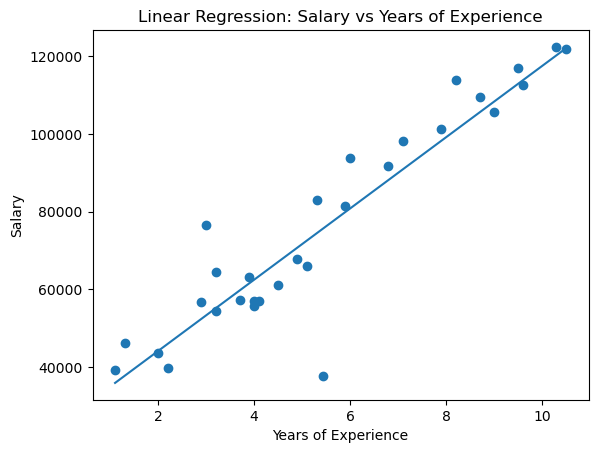

In [9]:

 
# Create smooth values for X-axis (for straight line)
X_line = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
 
# Predict salary for the line
y_line = model.predict(X_line)
 
# Plot actual data points
plt.figure()
plt.scatter(X, y)
 
# Plot regression line
plt.plot(X_line, y_line)
 
# Labels and title
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Linear Regression: Salary vs Years of Experience")
 
# Show plot
plt.show()
 